<a href="https://colab.research.google.com/github/sampsonola/PyScript/blob/main/Clustering_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
## Data cleaning - done same as in EDA notebook file

df= pd.read_csv('Project_Dataset.csv')
pd.set_option('display.max_columns',None)

df = df[['Geographic Area Name',
       'Parent Geographic Area Name', 'X', 'Y',
        'Is UN Member',  'Value 2000', 'Value 2001',
       'Value 2002', 'Value 2003', 'Value 2004', 'Value 2005', 'Value 2006',
       'Value 2007', 'Value 2008', 'Value 2009', 'Value 2010', 'Value 2011',
       'Value 2012', 'Value 2013', 'Value 2014', 'Value 2015', 'Value 2016',
       'Value 2017', 'Value 2018', 'Value 2019', 'Value 2020']]

df.rename(columns={'Geographic Area Name':'Country',
       'Parent Geographic Area Name':'Continent', 'X':'Latitude', 'Y':'Longitude',
        'Is UN Member':'UN Member',  'Value 2000':'2000', 'Value 2001':'2001',
       'Value 2002':'2002', 'Value 2003':'2003', 'Value 2004':'2004', 'Value 2005':'2005', 'Value 2006':'2006',
       'Value 2007':'2007', 'Value 2008':'2008', 'Value 2009':'2009', 'Value 2010':'2010', 'Value 2011':'2011',
       'Value 2012':'2012', 'Value 2013':'2013', 'Value 2014':'2014', 'Value 2015':'2015', 'Value 2016':'2016',
       'Value 2017':'2017', 'Value 2018':'2018', 'Value 2019':'2019', 'Value 2020':'2020'},inplace=True)

df.drop_duplicates(inplace=True)


continent_mapping = {
    'Australia and New Zealand': 'Australia/Oceania',
    'Caribbean': 'North America',
    'Central America': 'North America',
    'Central Asia': 'Asia',
    'Channel Islands': 'Europe',
    'Eastern Africa': 'Africa',
    'Eastern Asia': 'Asia',
    'Eastern Europe': 'Europe',
    'Middle Africa': 'Africa',
    'Northern Africa': 'Africa',
    'Northern America': 'North America',
    'Northern Europe': 'Europe',
    'Oceania (exc. Australia and New Zealand)': 'Australia/Oceania',
    'South America': 'South America',
    'South-Eastern Asia': 'Asia',
    'Southern Africa': 'Africa',
    'Southern Asia': 'Asia',
    'Southern Asia (excluding India)': 'Asia',
    'Southern Europe': 'Europe',
    'Western Africa': 'Africa',
    'Western Asia': 'Asia',
    'Western Europe': 'Europe'
}

# Map the continents using the mapping dictionary
df['Continent'] = df['Continent'].map(continent_mapping)

df['Total_Refugees'] = df.loc[:, '2000':'2020'].sum(axis=1)

# df = df[df['Total_Refugees'] != 0]

df.reset_index(inplace=True,drop=True)

In [4]:
df.head(2)

,Country,Continent,Latitude,Longitude,UN Member,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Total_Refugees
0,Afghanistan,Asia,66.026882,33.831602,1,14721.899,14989.179,9996.763,8273.798,8895.939,7786.15,7384.261,10138.719,9272.067,9229.338,9474.811,8127.742,7663.179,7340.715,7218.435,7190.673,6602.829,6742.651,6727.861,6690.218,6248.987,180716.214
1,Åland Islands,Europe,19.809460,60.154490,0,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [5]:
df.columns

Index(['Country', 'Continent', 'Latitude', 'Longitude', 'UN Member', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020', 'Total_Refugees'],
      dtype='object')

In [6]:
# function for assigning columns to cluster data

def data_cluster(df):
  col = ['2000','2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020']
  return df[col]

In [7]:
# function to check explained variation in Principal components

def pca_cal(clust):
  scale = StandardScaler()
  clust = scale.fit_transform(clust)

  # Perform PCA
  pca = PCA(n_components=None)  # Keep all components
  pca.fit(clust)

  # Get the explained variance ratio
  explained_variance_ratio = pca.explained_variance_ratio_

  # Calculate the cumulative explained variance
  cumulative_explained_variance = explained_variance_ratio.cumsum()

  # Create a DataFrame for easier visualization
  pca_df = pd.DataFrame({
      'Principal Component': range(1, len(explained_variance_ratio) + 1),
      'Explained Variance Ratio': explained_variance_ratio,
      'Cumulative Explained Variance': cumulative_explained_variance
  })


  print(pca_df.head())



In [9]:
# function for Kmeans - elbow analysis

def km_cal(pc_df):
  inertia =[]

  for k in range(1,10):
    kmeans= KMeans(n_clusters = k, random_state=50)
    kmeans.fit(pc_df)
    inertia.append(kmeans.inertia_)

  plt.figure(figsize=(8,5))
  plt.plot(range(1,10),inertia,marker='o')
  plt.title('Elbow analysis for optimal number of clusters')
  plt.xlabel('Number of clusters')
  plt.ylabel('Inertia')
  plt.show()


In [10]:
# function to plot clusters against first two PCs

def plot_pca(df):
  plt.figure(figsize=(6,4))
  sns.scatterplot(x='PC1', y='PC2', palette='viridis', data=df, hue='Clusters')
  plt.title('Scatter Plot of PC1 vs PC2')
  plt.xlabel('Principal Component 1')
  plt.ylabel('Principal Component 2')
  plt.show()

In [11]:
clust = data_cluster(df)

In [12]:
clust.shape

(245, 21)

In [13]:
clust.head(3)

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,14721.899,14989.179,9996.763,8273.798,8895.939,7786.150,7384.261,10138.719,9272.067,9229.338,9474.811,8127.742,7663.179,7340.715,7218.435,7190.673,6602.829,6742.651,6727.861,6690.218,6248.987
1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,216.865,243.105,342.946,331.895,336.204,410.321,457.541,502.930,497.301,525.571,498.582,460.615,429.466,346.753,349.428,358.644,381.710,420.117,466.535,518.899,536.958


In [14]:
pca_cal(clust)

   Principal Component  Explained Variance Ratio  \
0                    1                  0.761587   
1                    2                  0.188674   
2                    3                  0.021464   
3                    4                  0.011992   
4                    5                  0.006558   

   Cumulative Explained Variance  
0                       0.761587  
1                       0.950261  
2                       0.971725  
3                       0.983716  
4                       0.990275  


In [15]:
## from the above, we can conclude that first 2 PC represent the 95.02 % of variance in data
## So, we can use top 2 PCA for our study

pca= PCA(n_components=2)
pca_feature = pca.fit_transform(clust)

pc_df = pd.DataFrame(data = pca_feature, columns=['PC1','PC2'])


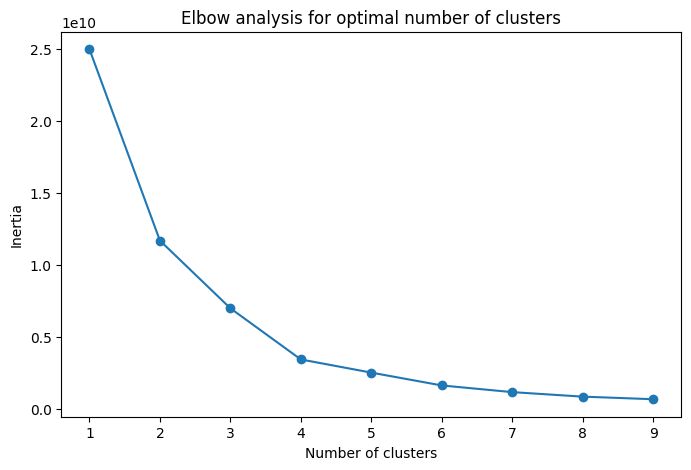

In [16]:
km_cal(pc_df)

In [17]:
## so, optimal_cluster = 4

kmeans = KMeans(n_clusters= 4 ,random_state=50)
df['Clusters'] = kmeans.fit_predict(pc_df)

df['Clusters'].value_counts()

Clusters
0    233
1      8
2      3
3      1
Name: count, dtype: int64

In [18]:
## change below code as per above output
# Here, value count in cluster 1,2,3 is very small, so lets combine them in same cluster

df['Clusters'] = df['Clusters'].replace({2:1, 3:1})

df['PC1'] = pc_df['PC1']
df['PC2'] = pc_df['PC2']

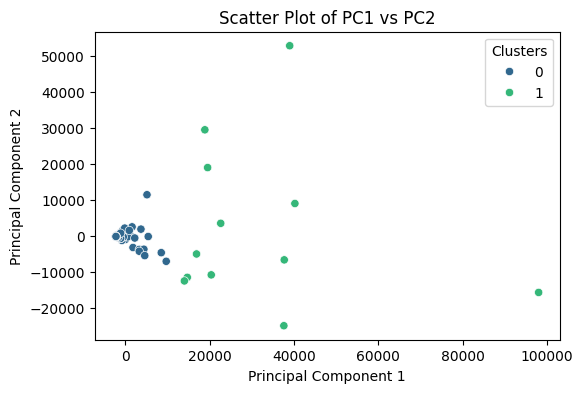

In [19]:
plot_pca(df)

In [20]:
## Above graph show that maximum data is very concentrated
## So we can done sub clustering of cluster=0 to further separate them.

In [21]:
## change below as per above output
# Filter countries with cluster value = 0

c1 = df[df['Clusters'] == 0]

c1.reset_index(inplace=True,drop=True)

In [22]:
c1.head()

,Country,Continent,Latitude,Longitude,UN Member,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Total_Refugees,Clusters,PC1,PC2
0,Åland Islands,Europe,19.809460,60.154490,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,-2207.476850,-80.728430
1,Albania,Europe,20.066609,41.138970,1,216.865,243.105,342.946,331.895,336.204,410.321,457.541,502.930,497.301,525.571,498.582,460.615,429.466,346.753,349.428,358.644,381.710,420.117,466.535,518.899,536.958,8632.386,0,-410.085236,107.591871
2,Algeria,Africa,2.678164,28.159400,1,25.813,26.697,37.932,36.101,32.569,36.259,24.782,31.012,26.034,23.111,18.522,16.631,15.130,9.551,9.014,8.734,9.136,9.714,9.912,10.495,10.701,427.850,0,-2113.729187,-118.442434
3,American Samoa,Australia/Oceania,-170.718727,-14.305873,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,-2207.476850,-80.728430
4,Andorra,Europe,1.576257,42.545486,1,0.000,0.000,12.847,9.565,0.000,12.677,12.345,12.093,5.962,5.920,5.920,5.970,7.279,6.190,6.312,6.410,0.000,0.000,0.000,0.000,19.410,128.900,0,-2181.420209,-84.164339


In [23]:
clust1 = data_cluster(c1)

In [24]:
clust1.shape

(233, 21)

In [25]:
pca_cal(clust1)

   Principal Component  Explained Variance Ratio  \
0                    1                  0.573624   
1                    2                  0.158616   
2                    3                  0.117151   
3                    4                  0.086878   
4                    5                  0.038266   

   Cumulative Explained Variance  
0                       0.573624  
1                       0.732240  
2                       0.849391  
3                       0.936269  
4                       0.974535  


In [26]:
##Here, 4 PCs have 93.6% of variance of data
pca1= PCA(n_components=4)
pca_feature1 = pca1.fit_transform(clust1)

pc1_df = pd.DataFrame(data = pca_feature1, columns=['PC1','PC2','PC3', 'PC4'])

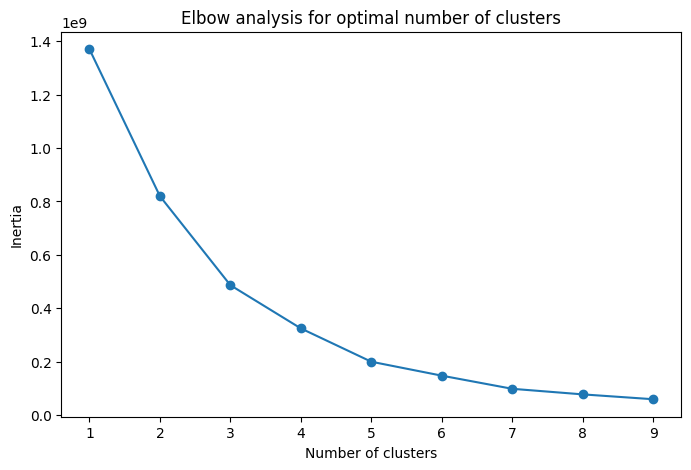

In [27]:
km_cal(pc1_df)

In [28]:
## so, optimal_cluster = 5

kmeans1 = KMeans(n_clusters= 5 ,random_state=50)
c1['Clusters'] = kmeans1.fit_predict(pc1_df)

c1['Clusters'].value_counts()

Clusters
0    218
1     10
4      3
2      1
3      1
Name: count, dtype: int64

In [29]:
## As value in other clusters are very small, lets club them

c1['Clusters'] = c1['Clusters'].replace({2:1, 3:1, 4:1})

c1['PC1'] = pc1_df['PC1']
c1['PC2'] = pc1_df['PC2']

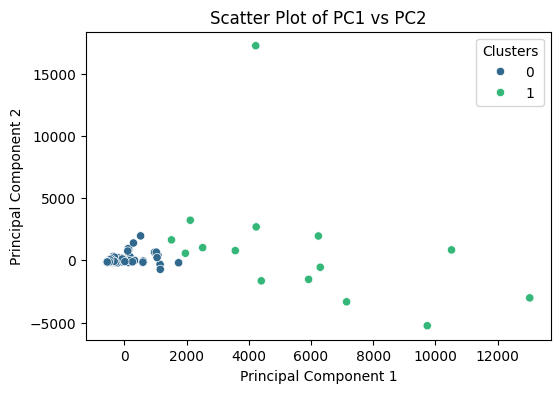

In [30]:
plot_pca(c1)

In [31]:
print('Clusters in Dataset',df['Clusters'].value_counts())

print('Sub-cluster in cluster=0 of the dataset', c1['Clusters'].value_counts())

Clusters in Dataset Clusters
0    233
1     12
Name: count, dtype: int64
Sub-cluster in cluster=0 of the dataset Clusters
0    218
1     15
Name: count, dtype: int64


In [32]:
# Here, we have 3 clusters for our analysis
# cluster A =  cluster - 1 of dataset
# cluster B = sub-cluster - 1 of cluster-1 of dataset
# cluster C = sub-cluster - 0 of cluster-1 of dataset

A = df[df['Clusters']==1][['Country', 'Continent','Total_Refugees']]
B = c1[c1['Clusters']==1][['Country', 'Continent','Total_Refugees']]
C = c1[c1['Clusters']==0][['Country', 'Continent','Total_Refugees']]


In [33]:
# Let's print their mean value of refugees influx

print('Mean value for Cluster A', A['Total_Refugees'].mean())
print('Mean value for Cluster B', B['Total_Refugees'].mean())
print('Mean value for Cluster C', C['Total_Refugees'].mean())

Mean value for Cluster A 152103.33408333335
Mean value for Cluster B 26338.822266666666
Mean value for Cluster C 965.3659908256882


Here cluster A & B has very high refugee numbers wrt C, lets analyse their geographical properties

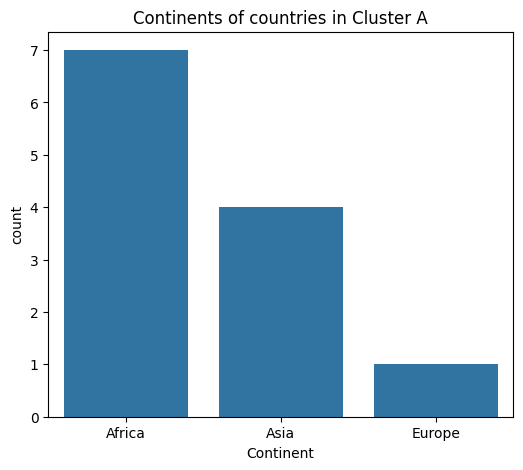

In [35]:
plt.figure(figsize=(6,5))
sns.barplot(A['Continent'].value_counts())
plt.title('Continents of countries in Cluster A')
plt.show()

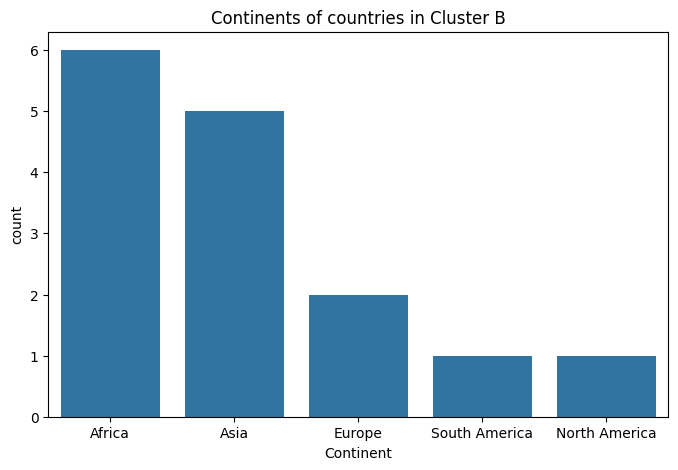

In [36]:
plt.figure(figsize=(8,5))
sns.barplot(B['Continent'].value_counts())
plt.title('Continents of countries in Cluster B')
plt.show()

In [37]:
print('Countries in CLuster A & B',A['Country'].unique(),B['Country'].unique())

Countries in CLuster A & B ['Afghanistan' 'Bhutan' 'Bosnia and Herzegovina' 'Burundi'
 'Central African Republic' 'Eritrea' 'Somalia' 'South Sudan'
 'State of Palestine' 'Syrian Arab Republic' 'Western Sahara' 'Liberia'] ['Angola' 'Azerbaijan' 'Croatia' 'Democratic Republic of the Congo'
 'Serbia' 'Sierra Leone' 'Sri Lanka' 'Sudan' 'Timor-Leste'
 'Venezuela (Bolivarian Republic of)' 'Iraq' 'Mauritania' 'Myanmar'
 'Rwanda' 'Saint Vincent and the Grenadines']


In [38]:
## Based on above result of continents and countries data, we can study their policies and economic condition
## which affect the number of refugees of that countries